<a href="https://colab.research.google.com/github/lenazlobina/Project-2/blob/main/%D0%97%D0%BB%D0%BE%D0%B1%D0%B8%D0%BD%D0%B0_%D0%95%D0%BB%D0%B5%D0%BD%D0%B0__%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистический метод
Данный метод опирается на подсчет разницы между частотами общих слов из каждой сравниваемой пары корпусов и суммирование квадратов этих разниц. Полученная сумма для каждой пары называется индексом схожести (similarity score).
Тексты с меньшим индексом схожести являются более близкими по количественно-словарному составу.

In [1]:
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# указываем путь к файлам с корпусами текстов (автор = text1, псевдоним = text2, коллега = text3)
file_path1 = '/content/drive/My Drive/P2TF/articles_1.txt'
with open(file_path1, 'r', encoding='utf-8') as f: text1 = f.read()


In [3]:
len(text1)

300469

In [21]:
# приводим остальные два корпуса к длине первого корпуса, чтобы разница в количестве общих слов не слишком влияла на вычисляемый нами индекс схожести (similarity_score)
file_path2 = '/content/drive/My Drive/P2TF/articles_2.txt'
with open(file_path2, 'r', encoding='utf-8') as f: text2 = f.read()[:300469]

file_path3 = '/content/drive/My Drive/P2TF/articles_3.txt'
with open(file_path3, 'r', encoding='utf-8') as f: text3 = f.read()[:300469]

In [22]:
# предобрабатываем и токенизируем корпуса, удаляем стоп-слова, прописываем функции для вычисления индекса схожести между корпусами попарно
# попробуем несколько вариантов предобработки, чтобы выяснить наиболее эффективный для данной задачи
# Предобработка 1 - без стоп-слов
def clean_text(text):
    tokens = word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalpha()]
    filtered_words = [word for word in words if word not in stopwords.words('russian')]
    return filtered_words

def calculate_similarity_true(text1, text2):
    clean_text1 = clean_text(text1)
    clean_text2 = clean_text(text2)

    counter1 = Counter(clean_text1)
    counter2 = Counter(clean_text2)

    common_words_true = set(counter1.keys()) & set(counter2.keys())

    similarity_true = sum((counter1[word] - counter2[word]) ** 2 for word in common_words_true)

    return similarity_true

def calculate_similarity_false(text2, text3):
    clean_text2 = clean_text(text2)
    clean_text3 = clean_text(text3)

    counter2 = Counter(clean_text2)
    counter3 = Counter(clean_text3)

    common_words_false = set(counter2.keys()) & set(counter3.keys())

    similarity_false = sum((counter2[word] - counter3[word]) ** 2 for word in common_words_false)

    return similarity_false

In [6]:
print(clean_text(text1)[:20])# на всякий случай проверяем, как выглядел предобработанный корпус - стоп-слова удалены

['году', 'петербургский', 'международный', 'экономический', 'форум', 'пмэф', 'отмечает', 'юбилей', 'мероприятие', 'проводится', 'преддверии', 'форума', 'октагон', 'задал', 'вопросы', 'ключевым', 'финансовым', 'темам', 'последних', 'недель']


In [24]:
# вычисляем индекс схожести
similarity_score_true = calculate_similarity_true(text1, text2)
print("Индекс схожести текстов из корпуса автора и корпуса под псевдонимом:", similarity_score_true)

similarity_score_false = calculate_similarity_false(text2, text3)
print("Индекс схожести текстов из корпуса под псевдонимом и корпуса коллеги:", similarity_score_false)

# индекс схожести корпуса под псевдонимом с корпусом автора в 1,37 раза лучше, чем корпуса под псевдонимом с корпусом коллеги

Индекс схожести текстов из корпуса автора и корпуса под псевдонимом: 128990
Индекс схожести текстов из корпуса под псевдонимом и корпуса коллеги: 177118


In [30]:
# Предобработка 2 - то же, что и в Предобработке 1, но не будем удалять стоп-слова, т.к. служебные части речи могут указывать на авторский стиль
def clean_text(text):
    tokens = word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalpha()]
    #filtered_words = [word for word in words if word not in stopwords.words('russian')]
    return words

def calculate_similarity_true(text1, text2):
    clean_text1 = clean_text(text1)
    clean_text2 = clean_text(text2)

    counter1 = Counter(clean_text1)
    counter2 = Counter(clean_text2)

    common_words_true = set(counter1.keys()) & set(counter2.keys())

    similarity_true = sum((counter1[word] - counter2[word]) ** 2 for word in common_words_true)

    return similarity_true

def calculate_similarity_false(text2, text3):
    clean_text2 = clean_text(text2)
    clean_text3 = clean_text(text3)

    counter2 = Counter(clean_text2)
    counter3 = Counter(clean_text3)

    common_words_false = set(counter2.keys()) & set(counter3.keys())

    similarity_false = sum((counter2[word] - counter3[word]) ** 2 for word in common_words_false)

    return similarity_false

In [26]:
print(clean_text(text1)[:20]) # на всякий случай проверяем, как выглядел предобработанный корпус - стоп-слова в нем не удалялись

['в', 'этом', 'году', 'петербургский', 'международный', 'экономический', 'форум', 'пмэф', 'отмечает', 'юбилей', 'мероприятие', 'проводится', 'в', 'раз', 'в', 'преддверии', 'форума', 'октагон', 'задал', 'вопросы']


In [36]:
# вычисляем индексы схожести
similarity_score_true = calculate_similarity_true(text1, text2)
print("Индекс схожести текстов из корпуса автора и корпуса под псевдонимом:", similarity_score_true)

similarity_score_false = calculate_similarity_false(text2, text3)
print("Индекс схожести текстов из корпуса под псевдонимом и корпуса коллеги:", similarity_score_false)
# индекс схожести корпуса автора и корпуса под псевдонимом примерно в 1.48 раз лучше, чем индекс схожести корпуса под пресвдонимои и корпуса коллеги
# Получается, токенизация с оставлением стоп-слов сработала чуть лучше, чем токенизация без стоп-слов

Индекс схожести текстов из корпуса автора и корпуса под псевдонимом: 421438
Индекс схожести текстов из корпуса под псевдонимом и корпуса коллеги: 570958


In [2]:
from pymystem3 import Mystem
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [33]:
# Предобработка 3 - добавим лемматизацию, но не будем удалять стоп-слова, т.к. служебные части речи могут указывать на авторский стиль

def clean_text(text):
    text_lemmatized = mystem.lemmatize(text)
    text_without_punkt_lem = [word.lower() for word in text_lemmatized if word.isalpha()]
    text_list_without_punkt_lem = ' '.join(text_without_punkt_lem)
    tokens = word_tokenize(text_list_without_punkt_lem)
    return tokens

def calculate_similarity_true(text1, text2):
    clean_text1 = clean_text(text1)
    clean_text2 = clean_text(text2)

    counter1 = Counter(clean_text1)
    counter2 = Counter(clean_text2)

    common_words_true = set(counter1.keys()) & set(counter2.keys())

    similarity_true = sum((counter1[word] - counter2[word]) ** 2 for word in common_words_true)

    return similarity_true

def calculate_similarity_false(text2, text3):
    clean_text2 = clean_text(text2)
    clean_text3 = clean_text(text3)

    counter2 = Counter(clean_text2)
    counter3 = Counter(clean_text3)

    common_words_false = set(counter2.keys()) & set(counter3.keys())

    similarity_false = sum((counter2[word] - counter3[word]) ** 2 for word in common_words_false)

    return similarity_false

In [34]:
print(clean_text(text1)[:20]) # на всякий случай проверяем, как выглядел предобработанный корпус - лемматизация прошла успешно, стоп-слова не удалялись

['в', 'этот', 'год', 'петербургский', 'международный', 'экономический', 'форум', 'пмэф', 'отмечать', 'юбилей', 'мероприятие', 'проводиться', 'в', 'й', 'раз', 'в', 'преддверие', 'форум', 'октагон', 'задавать']


In [37]:
# вычисляем индексы схожести
similarity_score_true = calculate_similarity_true(text1, text2)
print("Индекс схожести текстов из корпуса автора и корпуса под псевдонимом:", similarity_score_true)

similarity_score_false = calculate_similarity_false(text2, text3)
print("Индекс схожести текстов из корпуса под псевдонимом и корпуса коллеги:", similarity_score_false)

# индекс схожести корпуса автора и корпуса под псевдонимом в 1.35 раз лучше, чем индекс схожести корпуса под псевдонимом и корпуса коллеги
# тем не менее, это самый маленький по схожести индекс из всех полученных

Индекс схожести текстов из корпуса автора и корпуса под псевдонимом: 421438
Индекс схожести текстов из корпуса под псевдонимом и корпуса коллеги: 570958


In [38]:
# Предобработка 4 - посмотрим, как повлияет на индекс схожести удаление стоп-слов из лемматизированных и токенизированных корпусов

def clean_text(text):
    text_lemmatized = mystem.lemmatize(text)
    text_without_punkt_lem = [word.lower() for word in text_lemmatized if word.isalpha()]
    text_list_without_punkt_lem = ' '.join(text_without_punkt_lem)
    tokens = word_tokenize(text_list_without_punkt_lem)
    filtered_words = [word for word in tokens if word not in stopwords.words('russian')]
    return filtered_words

def calculate_similarity_true(text1, text2):
    clean_text1 = clean_text(text1)
    clean_text2 = clean_text(text2)

    counter1 = Counter(clean_text1)
    counter2 = Counter(clean_text2)

    common_words_true = set(counter1.keys()) & set(counter2.keys())

    similarity_true = sum((counter1[word] - counter2[word]) ** 2 for word in common_words_true)

    return similarity_true

def calculate_similarity_false(text2, text3):
    clean_text2 = clean_text(text2)
    clean_text3 = clean_text(text3)

    counter2 = Counter(clean_text2)
    counter3 = Counter(clean_text3)

    common_words_false = set(counter2.keys()) & set(counter3.keys())

    similarity_false = sum((counter2[word] - counter3[word]) ** 2 for word in common_words_false)

    return similarity_false

In [39]:
print(clean_text(text1)[:20]) # на всякий случай проверяем, как выглядел предобработанный корпус - лемматизация прошла успешно, стоп-слова удалены

['год', 'петербургский', 'международный', 'экономический', 'форум', 'пмэф', 'отмечать', 'юбилей', 'мероприятие', 'проводиться', 'й', 'преддверие', 'форум', 'октагон', 'задавать', 'вопрос', 'ключевой', 'финансовый', 'тема', 'последний']


In [40]:
# вычисляем индексы схожести
similarity_score_true = calculate_similarity_true(text1, text2)
print("Индекс схожести текстов из корпуса автора и корпуса под псевдонимом:", similarity_score_true)

similarity_score_false = calculate_similarity_false(text2, text3)
print("Индекс схожести текстов из корпуса под псевдонимом и корпуса коллеги:", similarity_score_false)

# индекс схожести корпуса автора и корпуса под псевдонимом в 1.52 раза лучше, чем индекс схожести корпуса под псевдонимом и корпуса коллеги
# это наиболее удачный результат из всех четырех

Индекс схожести текстов из корпуса автора и корпуса под псевдонимом: 269341
Индекс схожести текстов из корпуса под псевдонимом и корпуса коллеги: 409983


**Вывод:** Статистическая мера сработала, во всех случаях индекс схожести корпуса под псевдонимом и корпуса автора был меньше(т.е. лучше) индекса схожести корпуса под псевдонимом и корпуса коллеги. Разница в лучшем (1,52) и худшем (1,35) соотношении индексов схожести совсем небольшая, поэтому добавление лемматизации и удаление стоп-слов в моем случае не оказало существенного влияния на результат.
В любом случае, успешный результат использования данного метода говорит, скорее, о лексическом сходстве между вокабулярами корпусов, чем о принадлежности их одному автору.

# 2. Векторное сходство
Этот способ заключается в применении Tf-Idf векторизатора и вычислении косинусного сходства между корпусами.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
# Для работы с корпусами полной длины у моего компьютера не было достаточно памяти, поэтому я решила сократить их объем до 200 тысяч знаков
file_path1 = '/content/drive/My Drive/P2TF/articles_1.txt'
with open(file_path1, 'r', encoding='utf-8') as f: text1_short = f.read()[:200000]

file_path2 = '/content/drive/My Drive/P2TF/articles_2.txt'
with open(file_path2, 'r', encoding='utf-8') as f: text2_short = f.read()[:200000]

file_path3 = '/content/drive/My Drive/P2TF/articles_3.txt'
with open(file_path3, 'r', encoding='utf-8') as f: text3_short = f.read()[:200000]

In [43]:
# Сначала попробуем подать в код тексты без предобработки
corpus = [
    text1_short,
    text2_short,
    text3_short
]

In [44]:
# проверим, как выгладит корпус
print((corpus[0][:100]))

В этом году Петербургский международный экономический форум (ПМЭФ) отмечает юбилей – мероприятие про


In [4]:
# создаем объект TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [46]:
# преобразуем тексты в матрицу Tf-Idf признаков
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [47]:
# вычисляем сходство между матрицами признаков
similarity_matrix = cosine_similarity(tfidf_matrix)

In [48]:
for i in range(len(corpus)):
    print(f"Схожесть текста {i+1} с остальными текстами:")
    for j in range(len(corpus)):
        if i != j:
            print(f"Текст {i+1} и текст {j+1}: {similarity_matrix[i][j]}")
# полученное косинусное сходство гоорит о большей схожести корпуса автора с корпусом под псевдонимом (0.90), чем о схожести корпуса псевдонима с корпусом коллеги (0.86)

Схожесть текста 1 с остальными текстами:
Текст 1 и текст 2: 0.9041297422291208
Текст 1 и текст 3: 0.8858423553980781
Схожесть текста 2 с остальными текстами:
Текст 2 и текст 1: 0.9041297422291208
Текст 2 и текст 3: 0.8666426469300487
Схожесть текста 3 с остальными текстами:
Текст 3 и текст 1: 0.8858423553980781
Текст 3 и текст 2: 0.8666426469300487


In [49]:
# теперь попробуем предобработать текст перед подачей в векторизатор
# токенизируем тексты, приведем все слова к нижнему регистру, удалим небуквенные символы, но не будем пока удалять стоп-слова и лемматизировать корпуса

def clean_text(text):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    return ' '.join(words)

In [50]:
corpus1 = [
    clean_text(text1_short),
    clean_text(text2_short),
    clean_text(text3_short)
]


In [51]:
print(corpus1[0][:100])

в этом году петербургский международный экономический форум пмэф отмечает юбилей мероприятие проводи


In [52]:
tfidf_matrix1 = tfidf_vectorizer.fit_transform(corpus1)

In [53]:
similarity_matrix1 = cosine_similarity(tfidf_matrix1)

In [54]:
for i in range(len(corpus1)):
    print(f"Схожесть текста {i+1} с остальными текстами:")
    for j in range(len(corpus1)):
        if i != j:
            print(f"Текст {i+1} и текст {j+1}: {similarity_matrix1[i][j]}")
# полученные значения очень близки к тем, что были при подаче  текстов без предобработки

Схожесть текста 1 с остальными текстами:
Текст 1 и текст 2: 0.9079671234031804
Текст 1 и текст 3: 0.8872161883584108
Схожесть текста 2 с остальными текстами:
Текст 2 и текст 1: 0.9079671234031804
Текст 2 и текст 3: 0.8686910973792725
Схожесть текста 3 с остальными текстами:
Текст 3 и текст 1: 0.8872161883584108
Текст 3 и текст 2: 0.8686910973792725


In [55]:
# Следующий вариант предобработки - та, что обычно рекомендуется для данного метода: то же, что и в предыдущем пункте, но также удалим стоп-слова
def clean_text(text):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    filtered_words = [word for word in words if word not in stopwords.words('russian')]
    return ' '.join(filtered_words)

In [56]:
corpus2 = [
    clean_text(text1_short),
    clean_text(text2_short),
    clean_text(text3_short)
]

In [57]:
print(corpus2[0][:100])

году петербургский международный экономический форум пмэф отмечает юбилей мероприятие проводится пре


In [58]:
tfidf_matrix2 = tfidf_vectorizer.fit_transform(corpus2)

In [59]:
similarity_matrix2 = cosine_similarity(tfidf_matrix2)

In [76]:
for i in range(len(corpus2)):
    print(f"Схожесть текста {i+1} с остальными текстами:")
    for j in range(len(corpus2)):
        if i != j:
            print(f"Текст {i+1} и текст {j+1}: {similarity_matrix2[i][j]}")
# полученные значения снизились в числовом выражении, но остались сопоставимыми и симметричными тем, что были в предыдущих пунктах
# еще лучше проявилась разница в косинусном сходстве между автором-псевдонимом(0.66) и коллегой-псевдонимом(0.54), т.е. псевдоним гораздо ближе к автору, что соответствует действительности

Схожесть текста 1 с остальными текстами:
Текст 1 и текст 2: 0.6605525303521329
Текст 1 и текст 3: 0.6090660015094606
Схожесть текста 2 с остальными текстами:
Текст 2 и текст 1: 0.6605525303521329
Текст 2 и текст 3: 0.549447971684852
Схожесть текста 3 с остальными текстами:
Текст 3 и текст 1: 0.6090660015094606
Текст 3 и текст 2: 0.549447971684852


In [61]:
# Для эксперимента добавим лемматизацию в предобработку и посмотрим на результаты как со стоп-словами, так и без них
def clean_text(text):
    text_lemmatized = mystem.lemmatize(text)
    text_without_punkt_lem = [word.lower() for word in text_lemmatized if word.isalpha()] # and word not in stopwords.words('russian')]
    return ' '.join(text_without_punkt_lem)

In [62]:
corpus3 = [
    clean_text(text1_short),
    clean_text(text2_short),
    clean_text(text3_short)
]

In [63]:
print(corpus3[0][:100])

в этот год петербургский международный экономический форум пмэф отмечать юбилей мероприятие проводит


In [64]:
tfidf_matrix3 = tfidf_vectorizer.fit_transform(corpus3)

In [65]:
similarity_matrix3 = cosine_similarity(tfidf_matrix3)

In [66]:
for i in range(len(corpus3)):
    print(f"Схожесть текста {i+1} с остальными текстами:")
    for j in range(len(corpus3)):
        if i != j:
            print(f"Текст {i+1} и текст {j+1}: {similarity_matrix3[i][j]}")
# Полученные значения сопоставимы и пропорциональны тем, что были получены выше.
# Делаем вывод, что лемматизация не оказывает существенного влияния на результаты вычисления косинусного сходства

Схожесть текста 1 с остальными текстами:
Текст 1 и текст 2: 0.9070809515083691
Текст 1 и текст 3: 0.8831019005990008
Схожесть текста 2 с остальными текстами:
Текст 2 и текст 1: 0.9070809515083691
Текст 2 и текст 3: 0.8567370076989871
Схожесть текста 3 с остальными текстами:
Текст 3 и текст 1: 0.8831019005990008
Текст 3 и текст 2: 0.8567370076989871


**Вывод**: Векторное сходство сработало успешно, и во всех случаях числовое значение косинусного сходства в паре автор-псевдоним было ближе к 1, чем в паре коллега-псевдоним. Но поскольку все полученные значения были ближе к 1, чем к 0, то в данном случае нельзя говорить о ярко выраженных различиях между корпусами. Маленькая разница в косинусном сходстве между всеми корпусами может быть объяснена тем, что тематически и стилистически корпуса очень близки друг к другу, написаны они также были примерно в одно время.

Что касается наиболеее эффективной предобработки, то удаление стоп-слов занижает числовые показатели косинусного сходства, но при этом размеры числовых показателей вполне пропорциональны тем, которые получаются, если не удалять стоп-слова. Лемматизация (как с сохранением, так и с удалением стоп-слов) не оказывает существенного влияния на результаты вычисления косинусного сходства.
Рекомендованный во многих источниках способ предобработки перед векторизацией, включающий в себя приведение к нижнему регистру, токенизацию, удаление небуквенных символов и удаление стоп-слов, действительно доказал свою эффективность.

# 3. Машинное обучение


### 3.1  Модель для классификации текстов на два класса (автор или коллега) на основе логистической регрессии.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [78]:
# Чтобы у модели было больше примеров каждого класса, разобьем каждый текст на три отрезка
file_path1 = '/content/drive/My Drive/P2TF/articles_1.txt'
with open(file_path1, 'r', encoding='utf-8') as f: text1 = f.read()[:100000]
with open(file_path1, 'r', encoding='utf-8') as f: text2 = f.read()[100000:200000]
with open(file_path1, 'r', encoding='utf-8') as f: text3 = f.read()[200000:]

file_path2 = '/content/drive/My Drive/P2TF/articles_2.txt'
with open(file_path2, 'r', encoding='utf-8') as f: text4 = f.read()[:100000]
with open(file_path2, 'r', encoding='utf-8') as f: text5 = f.read()[100000:200000]
with open(file_path2, 'r', encoding='utf-8') as f: text6 = f.read()[200000:300469]

file_path3 = '/content/drive/My Drive/P2TF/articles_3.txt'
with open(file_path3, 'r', encoding='utf-8') as f: text7 = f.read()[:100000]
with open(file_path3, 'r', encoding='utf-8') as f: text8 = f.read()[100000:200000]
with open(file_path3, 'r', encoding='utf-8') as f: text9 = f.read()[200000:300469]

In [79]:
# Сначала попробуем подать в модель тексты разной длины без предобработки
texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

In [80]:
lables = [1, 1, 1, 1, 1, 1, 0, 0, 0]

In [6]:
# создаем объект векторизатора
vectorizer = CountVectorizer()

In [81]:
# векторизуем независимую переменную, т.к. она представлена текстовыми данными
X1 = vectorizer.fit_transform(texts)

In [82]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X1, lables, test_size=0.2, random_state=42)

In [83]:
# Обучение логистической регрессии
clf1_cv = LogisticRegression()
clf1_cv.fit(X_train, y_train)

LogisticRegression()

In [84]:
# применяем метод predict обученного классификатора на тестовых данных (уже преобразованных векторизатором)
y_pred1_cv = clf1_cv.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred1_cv))
# Модель отлично справилась с заданием, векторизатор и классификатор выбраны правильно
# Также, отметим, что модель отлично работает без предобработки текстов

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [86]:
# Предсказываем класс для каждого текста
predictions = clf1_cv.predict(X1)
for i, text in enumerate(texts):
    author = "Автор" if predictions[i] == 1 else "Коллега"
    print(f"Текст {i+1} имеет авторство: {author}")
# Видим, что модель точно определила корпуса, написанные Автором и Псведонимом, как "Автор" и ни разу не спутала Автора с Коллегой

Текст 1 имеет авторство: Автор
Текст 2 имеет авторство: Автор
Текст 3 имеет авторство: Автор
Текст 4 имеет авторство: Автор
Текст 5 имеет авторство: Автор
Текст 6 имеет авторство: Автор
Текст 7 имеет авторство: Коллега
Текст 8 имеет авторство: Коллега
Текст 9 имеет авторство: Коллега


In [87]:
# проверим, как справится Tfidf Vectorizer на той же модели логистической регрессии
X2 = tfidf_vectorizer.fit_transform(texts)

In [88]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X2, lables, test_size=0.2, random_state=42)

In [89]:
# Обучаем классификатор
clf1_tf = LogisticRegression()
clf1_tf.fit(X_train, y_train)

LogisticRegression()

In [90]:
# делаем предсказание на тестовой выборке
y_pred1_tf = clf1_tf.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred1_tf))
# Видим, что модель вдвое хуже справилась с предсказаниями, не смогла правильно предсказать класс "Коллега"
# Получается, что Tf-idf - не подходит для данной задачи

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# Предсказываем класс для каждого текста
predictions = clf1_tf.predict(X2)
for i, text in enumerate(texts):
    author = "Автор" if predictions[i] == 1 else "Коллега"
    print(f"Текст {i+1} имеет авторство: {author}")
# Модель не смогла правильно предсказать класс "Коллега"

Текст 1 имеет авторство: Автор
Текст 2 имеет авторство: Автор
Текст 3 имеет авторство: Автор
Текст 4 имеет авторство: Автор
Текст 5 имеет авторство: Автор
Текст 6 имеет авторство: Автор
Текст 7 имеет авторство: Автор
Текст 8 имеет авторство: Автор
Текст 9 имеет авторство: Автор


### 3.2 Модель для классификации текстов на два класса (автор или коллега) на основе мультиномиального классификатора.

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
X3 = vectorizer.fit_transform(texts)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X3, lables, test_size=0.2, random_state=42)

In [96]:
# Обучаем классификатор
clf2_cv = MultinomialNB()
clf2_cv.fit(X_train, y_train)

MultinomialNB()

In [97]:
# Предсказываем авторов для тестового набора
y_pred2_cv = clf2_cv.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred2_cv))
# Видим, что модель работает также хорошо, как и в случае с логистической регрессией, значит, выбран верный классификатор и векторизатор

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [100]:
# Предсказываем класс для каждого текста
predictions = clf2_cv.predict(X3)
for i, text in enumerate(texts):
    author = "Автор" if predictions[i] == 1 else "Коллега"
    print(f"Текст {i+1} имеет авторство: {author}")
# Видим, что модель точно определила корпуса, написанные Автором и Псведонимом, как "Автор" и ни разу не спутала Автора с Коллегой

Текст 1 имеет авторство: Автор
Текст 2 имеет авторство: Автор
Текст 3 имеет авторство: Автор
Текст 4 имеет авторство: Автор
Текст 5 имеет авторство: Автор
Текст 6 имеет авторство: Автор
Текст 7 имеет авторство: Коллега
Текст 8 имеет авторство: Коллега
Текст 9 имеет авторство: Коллега


In [101]:
# проверим, как справится Tfidf Vectorizer на этой же модели мультиномиальной классификации
X4 = tfidf_vectorizer.fit_transform(texts)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X4, lables, test_size=0.2, random_state=42)

In [103]:
clf2_tf = MultinomialNB()
clf2_tf.fit(X_train, y_train)

MultinomialNB()

In [104]:
# Предсказываем авторов для тестового набора
y_pred2_tf = clf2_tf.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred2_tf))
# Результат аналогичный другому неудачному результату выше - применение  tfidf ухудшает качество работы моделей
# применение опции stratify (stratify = lables) выдало такой же результат

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
# Предсказываем класс для каждого текста
predictions = clf2_tf.predict(X4)
for i, text in enumerate(texts):
    author = "Автор" if predictions[i] == 1 else "Коллега"
    print(f"Текст {i+1} имеет авторство: {author}")

Текст 1 имеет авторство: Автор
Текст 2 имеет авторство: Автор
Текст 3 имеет авторство: Автор
Текст 4 имеет авторство: Автор
Текст 5 имеет авторство: Автор
Текст 6 имеет авторство: Автор
Текст 7 имеет авторство: Автор
Текст 8 имеет авторство: Автор
Текст 9 имеет авторство: Автор


##3.3 Модель для классификации текстов на два класса (автор или коллега) на основе классификатора "Рандомный Лес" с подбором гиперпараметров.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
# Чтобы у модели было больше примеров каждого класса, разобьем каждый текст на три части
# Также, я пробовала подавать тексты как сокращенными до одной длины, так и полной длины, но результаты по качеству в итоге были одинаковыми
file_path1 = '/content/drive/My Drive/P2TF/articles_1.txt'
with open(file_path1, 'r', encoding='utf-8') as f: text1 = f.read()[:100000]
with open(file_path1, 'r', encoding='utf-8') as f: text2 = f.read()[100000:200000]
with open(file_path1, 'r', encoding='utf-8') as f: text3 = f.read()[200000:]

file_path2 = '/content/drive/My Drive/P2TF/articles_2.txt'
with open(file_path2, 'r', encoding='utf-8') as f: text4 = f.read()[:100000]
with open(file_path2, 'r', encoding='utf-8') as f: text5 = f.read()[100000:200000]
with open(file_path2, 'r', encoding='utf-8') as f: text6 = f.read()[200000:300469]

file_path3 = '/content/drive/My Drive/P2TF/articles_3.txt'
with open(file_path3, 'r', encoding='utf-8') as f: text7 = f.read()[:100000]
with open(file_path3, 'r', encoding='utf-8') as f: text8 = f.read()[100000:200000]
with open(file_path3, 'r', encoding='utf-8') as f: text9 = f.read()[200000:300469]



In [12]:
# Тексты подавались как предобработанными, так и нет, но результаты по качеству в итоге были одинаковыми
def clean_text(text):
    text_lemmatized = mystem.lemmatize(text)
    text_without_punkt_lem = [word.lower() for word in text_lemmatized if word.isalpha()] # and word not in stopwords.words('russian')]
    return ' '.join(text_without_punkt_lem)

In [13]:
texts = [
    clean_text(text1),
    clean_text(text2),
    clean_text(text3),
    clean_text(text4),
    clean_text(text5),
    clean_text(text6),
    clean_text(text7),
    clean_text(text8),
    clean_text(text9)
 ]

In [ ]:
# попробуем подать в модель тексты без предобработки
# texts = [text1, text2, text3, text4, text5, text6, text7, text8, text9]

In [14]:
authors = [1, 1, 1, 1, 1, 1, 0, 0, 0]

In [15]:
# векторизуем тексты
#X_rf = tfidf_vectorizer.fit_transform(texts)

#vectorizer = CountVectorizer()
X_rf = vectorizer.fit_transform(texts)

# пробовались разные варианты с применением Count Vectorizer и с Tf-idf Vectorizer, но результаты оценки качества не менялись

In [16]:
# разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_rf, authors, test_size=0.2, random_state=42)
# в нескольких комбинациях с применением разной длины текстов, предобработки и векторизаторов я также пробовала добавить stratify = authors,
# т.к. текстов Коллеги в два раза меньше, чем текстов Автора, но на результаты оценки качества это не повлияло

In [17]:
# Подбор параметров для модели с помощью Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [0.3, 'sqrt', 1.0],
    'max_depth': [None, 5, 7, 10, 20, 30]
}

In [18]:
Rf = RandomForestClassifier()
grid_search = GridSearchCV(Rf, param_grid, cv=2) # также пробовала и cv = 5, результаты не менялись, при этом модель предупреждала, что
#"The least populated class in y has only 2 members, which is less than n_splits=5"
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 7, 10, 20, 30],
                         'max_features': [0.3, 'sqrt', 1.0],
                         'n_estimators': [50, 100, 150]})

In [19]:
# Получение лучших параметров
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# этот результат сохранялся и при применении предобработки, и без нее, и с разными векторизаторами, и со/без стратификацией(-ии), и при cv =5, и при cv = 2

Best Parameters: {'max_depth': None, 'max_features': 0.3, 'n_estimators': 50}


In [20]:
# Обучение модели с лучшими параметрами
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.3, n_estimators=50)

In [21]:
# Предсказание авторства текстов
y_rf_pred = best_clf.predict(X_test)

In [22]:
print(classification_report(y_test, y_rf_pred))
# Этот результат выходил во всех вариациях с использованием данной классификации

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#4. Глубокое обучение, Doc2Vec, TSNE

### 4.1 Эмбединги текстов и вычисление семантической близости с применением Doc2Vec

In [41]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [24]:
file_path1 = '/content/drive/My Drive/P2TF/articles_1.txt'
with open(file_path1, 'r', encoding='utf-8') as f: text1 = f.read()

file_path2 = '/content/drive/My Drive/P2TF/articles_2.txt'
with open(file_path2, 'r', encoding='utf-8') as f: text2 = f.read()[:300469]

file_path3 = '/content/drive/My Drive/P2TF/articles_3.txt'
with open(file_path3, 'r', encoding='utf-8') as f: text3 = f.read()[:300469]

In [25]:
authors = []

file_path1 = '/content/drive/My Drive/P2TF/articles_1.txt'
with open(file_path1, 'r', encoding='utf-8') as f: authors.append("Автор")

file_path3 = '/content/drive/My Drive/P2TF/articles_3.txt'
with open(file_path3, 'r', encoding='utf-8') as f: authors.append("Коллега")

print(authors)

['Автор', 'Коллега']


In [26]:
# предобрабатываем тексты - лемматизируем, удаляем знаки препинания, токенизируем; стоп-слова оставляем
def clean_text(text):
    text_lemmatized = mystem.lemmatize(text)
    text_without_punkt_lem = [word.lower() for word in text_lemmatized if word.isalpha()]
    text_list_without_punkt_lem = ' '.join(text_without_punkt_lem)
    tokens = word_tokenize(text_list_without_punkt_lem)
    return tokens

In [27]:
texts_dv = [
    clean_text(text1),
    clean_text(text3)
]

In [28]:
# добавляем тэги в наши текстовые данные для последующей подачи в модель
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(texts_dv)]

In [30]:
# обучаем модель
d2v_model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=150)

In [31]:
# создаём словарь модели на основе корпуса документов
d2v_model.build_vocab(docs)

In [33]:
%%time
d2v_model.train(docs, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

CPU times: user 8.46 s, sys: 131 ms, total: 8.59 s
Wall time: 7.94 s


In [34]:
# предобрабатываем корпус под псевдонимом
text2_doc = (clean_text(text2))

In [35]:
# получаем вектор корпуса под псевдонимом
text2_vector = d2v_model.infer_vector(text2_doc)

In [36]:
# получаем косинусное сходство векторов Автора [0] и Коллеги [1] с вектором клрпуса под псевдонимом
similarity = d2v_model.dv.most_similar([text2_vector], topn=2)

In [37]:
similarity
# результат сходства в паре Автор-Псевдоним (0.67) очень близок к результату этой же пары в пункте про векторное сходство (0.66)

[(0, 0.6756372451782227), (1, 0.6425831317901611)]

In [38]:
print(f"Журналист, к которому корпус под псевдонимом ближе всего: {similarity[0]}")

Журналист, к которому корпус под псевдонимом ближе всего: (0, 0.6756372451782227)


In [39]:
authors[0]

'Автор'

In [40]:
# ранжируем корпуса по степени косинусного сходства с копусом под певдонимом
for doc_id, sim in d2v_model.dv.most_similar([text2_vector], topn=2):
  print(authors[doc_id])

Автор
Коллега


### 4.2 Визуализация c применением TSNE

In [42]:
texts_author = []
texts_penname = []
texts_colleague = []

In [44]:
# читаем каждый файл (уже предобработанный) и разбиваем его на десять частей, добавляя каждую из них в соответствующий список и присваиваем тэги каждой из частей:
file_path1 = '/content/drive/My Drive/P2TF/articles1_nltk.txt'
with open(file_path1, 'r', encoding='utf-8') as f: text1 = f.read().split(' ')
chunk_size = len(text1) // 20
texts_author.extend([TaggedDocument(words=text1[i:i+chunk_size], tags=[f"Author_{j}"]) for j, i in enumerate (range(0, len(text1), chunk_size))])

file_path2 = '/content/drive/My Drive/P2TF/articles2_short_nltk.txt'
with open(file_path2, 'r', encoding='utf-8') as f: text2 = f.read()[:40533].split(' ')
chunk_size = len(text2) // 20
texts_penname.extend([TaggedDocument(words=text2[i:i+chunk_size], tags=[f"Penname_{j}"]) for j, i in enumerate (range(0, len(text2), chunk_size))])

file_path3 = '/content/drive/My Drive/P2TF/articles3_short_nltk.txt'
with open(file_path3, 'r', encoding='utf-8') as f: text3 = f.read()[:40533].split(' ')
chunk_size = len(text3) // 20
texts_colleague.extend([TaggedDocument(words=text3[i:i+chunk_size], tags=[f"Colleague_{j}"]) for j, i in enumerate (range(0, len(text3), chunk_size))])

In [55]:
len(text1)

40533

In [45]:
# Cоздаем и обучаем модель Doc2Vec
docs_tsne = texts_author + texts_penname + texts_colleague
d2v_model_tsne = Doc2Vec(docs_tsne, vector_size=100, window=2, min_count=1, workers=4,epochs=150)

In [46]:
# Получение векторов документов и авторов
vectors_tsne = [d2v_model_tsne.dv[tag] for tag in d2v_model_tsne.dv.index_to_key]
vectors_tsne= np.array(vectors_tsne)

In [47]:
# снижаем размерность
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
vectors_2d = tsne.fit_transform(vectors_tsne)

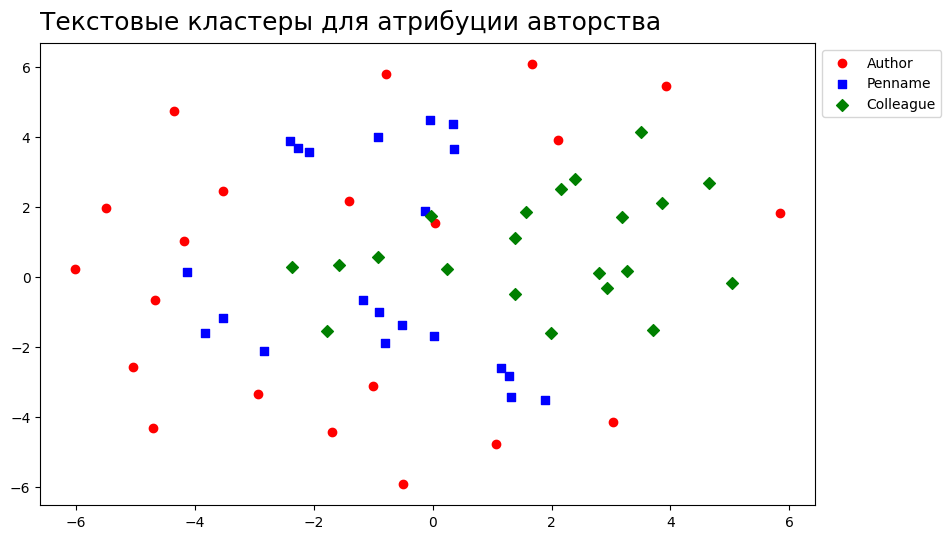

In [52]:
# строим график
plt.figure(figsize=(10, 6))
colors = {'Author': 'red', 'Penname': 'blue', 'Colleague': 'green'}
markers = {'Author': 'o', 'Penname': 's', 'Colleague': 'D'}

for i, txt in enumerate(d2v_model_tsne.dv.index_to_key):
    author, num = txt.split('_')
    plt.scatter (vectors_2d[i, 0], vectors_2d[i, 1], c=colors[author], marker=markers[author], label=author)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Текстовые кластеры для атрибуции авторства',
          size=18,
          loc='left',
          pad=10)

plt.show()